In [95]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

import yfinance as yf

In [96]:
start_date = datetime(2021,1,1)
end_date = datetime(2022,1,1)
NVR = yf.download('NVR',start_date ,end_date)

[*********************100%***********************]  1 of 1 completed


In [97]:
NVR.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [98]:
NVR

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600
...,...,...,...,...,...,...
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900
2021-12-29,5880.479980,5962.430176,5861.790039,5959.330078,5959.330078,7800


In [99]:
NVR["Date"] = NVR.index
NVR

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700,2021-01-04
2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,2021-01-05
2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400,2021-01-06
2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600,2021-01-07
2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600,2021-01-08
...,...,...,...,...,...,...,...
2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600,2021-12-27
2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900,2021-12-28
2021-12-29,5880.479980,5962.430176,5861.790039,5959.330078,5959.330078,7800,2021-12-29


In [100]:
NVR = NVR[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
NVR.reset_index(drop=True, inplace=True)
print(NVR.head())

        Date         Open         High          Low        Close    Adj Close  \
0 2021-01-04  4089.979980  4106.790039  3988.000000  4040.649902  4040.649902   
1 2021-01-05  4025.199951  4049.989990  3965.000000  4008.909912  4008.909912   
2 2021-01-06  3970.000000  4021.489990  3892.000000  3966.489990  3966.489990   
3 2021-01-07  3997.479980  4080.729980  3977.030029  4025.929932  4025.929932   
4 2021-01-08  4040.689941  4077.000000  3892.669922  3930.000000  3930.000000   

   Volume  
0   23700  
1   26800  
2   29400  
3   29600  
4   44600  


In [101]:
NVR

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700
1,2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800
2,2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400
3,2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600
4,2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600
...,...,...,...,...,...,...,...
247,2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
248,2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900
249,2021-12-29,5880.479980,5962.430176,5861.790039,5959.330078,5959.330078,7800
250,2021-12-30,5977.609863,5978.160156,5884.060059,5906.029785,5906.029785,8300


In [102]:
NVR['Year'] = pd.to_datetime(NVR['Date']).dt.year
NVR['Month'] = pd.to_datetime(NVR['Date']).dt.month
NVR

/var/folders/q_/k453wb756qb6rg_z6dc5p9fr0000gn/T/ipykernel_52834/2609004418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVR['Year'] = pd.to_datetime(NVR['Date']).dt.year
/var/folders/q_/k453wb756qb6rg_z6dc5p9fr0000gn/T/ipykernel_52834/2609004418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NVR['Month'] = pd.to_datetime(NVR['Date']).dt.month


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,2021-01-04,4089.979980,4106.790039,3988.000000,4040.649902,4040.649902,23700,2021,1
1,2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,2021,1
2,2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400,2021,1
3,2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600,2021,1
4,2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600,2021,1
...,...,...,...,...,...,...,...,...,...
247,2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600,2021,12
248,2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900,2021,12
249,2021-12-29,5880.479980,5962.430176,5861.790039,5959.330078,5959.330078,7800,2021,12
250,2021-12-30,5977.609863,5978.160156,5884.060059,5906.029785,5906.029785,8300,2021,12


/Users/saad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


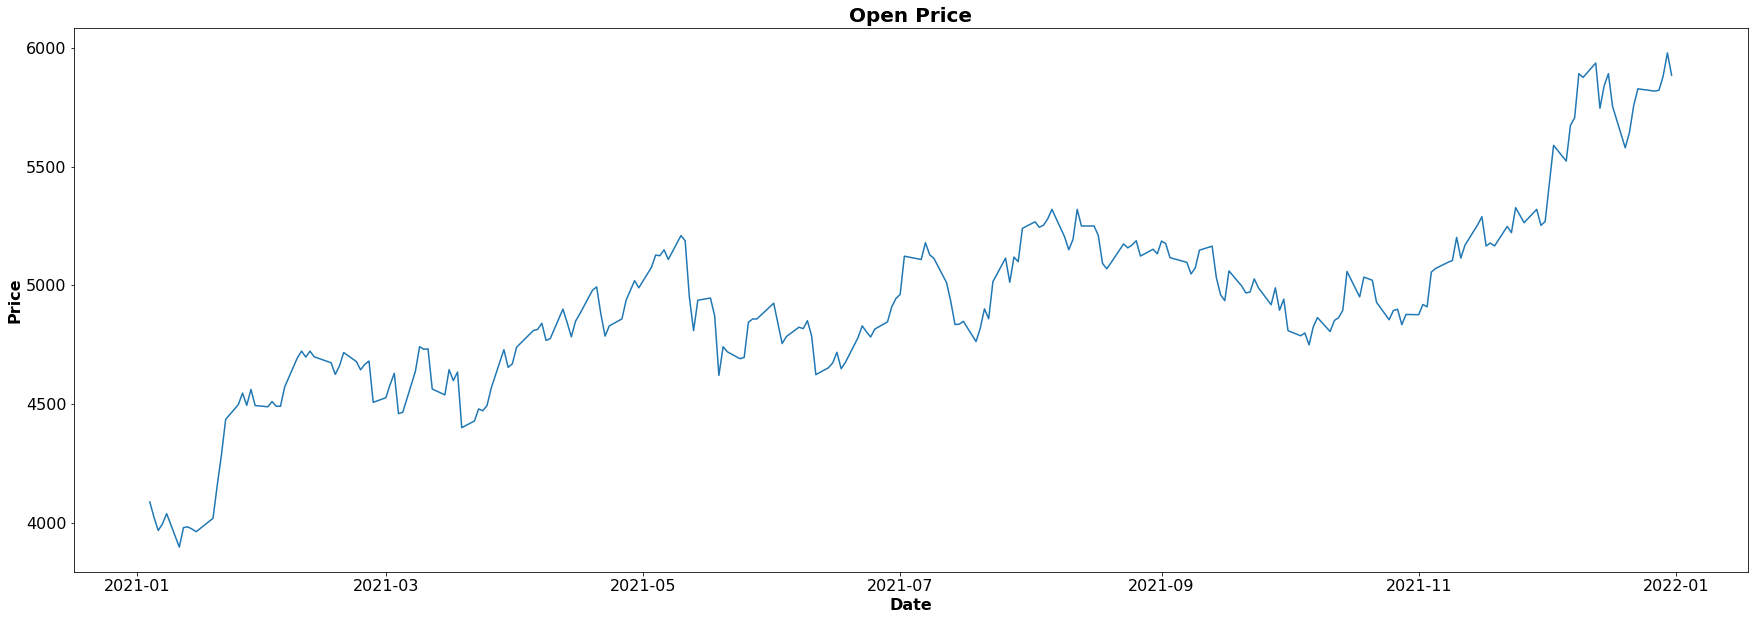

In [103]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.lineplot(NVR['Date'], NVR['Open'])

# Formatting
ax.set_title('Open Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

/Users/saad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


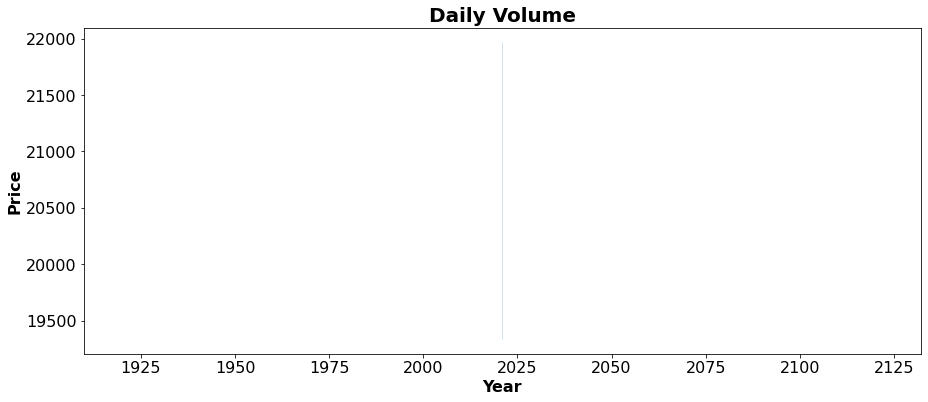

In [104]:
# Plot Daily Volume Lineplot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(NVR['Year'], NVR['Volume'] )

ax.set_title('Daily Volume', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)

/Users/saad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/saad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/saad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

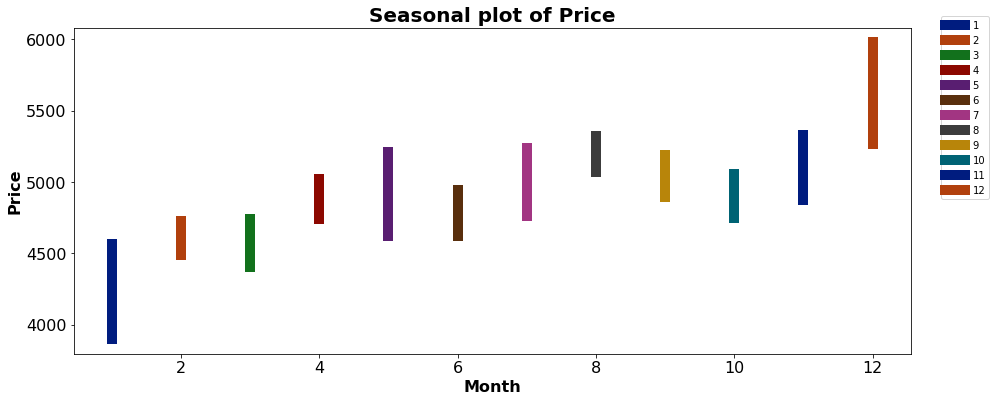

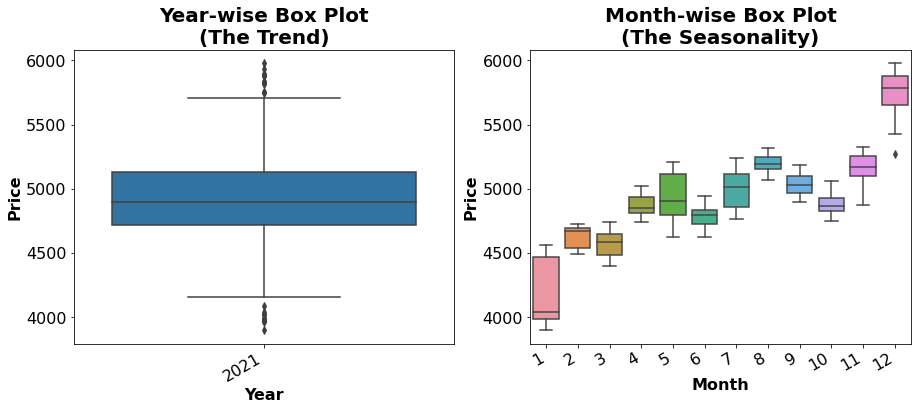

In [105]:
variable = 'Open'
fig, ax = plt.subplots(figsize=(15, 6))

sns.lineplot(NVR['Month'], NVR[variable], hue = NVR['Month'],palette=sns.color_palette('dark', n_colors=12),estimator=None,
    linewidth=10)
ax.set_title('Seasonal plot of Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
ax.legend(labels = [str(1+i) for i in range(12)], bbox_to_anchor=(1.1, 1.05))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(NVR['Year'], NVR[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(NVR['Month'], NVR[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))

fig.autofmt_xdate()

In [106]:
# Aggregating the Time Series to a monthly scaled index
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

y = NVR[['Date','Open','Close']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

y

,Open,Close
Date,,
2021-01-31,4180.893683,4202.109465
2021-02-28,4629.831569,4638.136333
2021-03-31,4582.933933,4599.272631
2021-04-30,4869.907599,4883.727167
2021-05-31,4926.995947,4915.592993
2021-06-30,4786.618186,4787.964555
2021-07-31,5001.581450,5018.800479
2021-08-31,5195.485463,5191.126376
2021-09-30,5033.646159,5015.083845


Text(0, 0.5, 'Close')

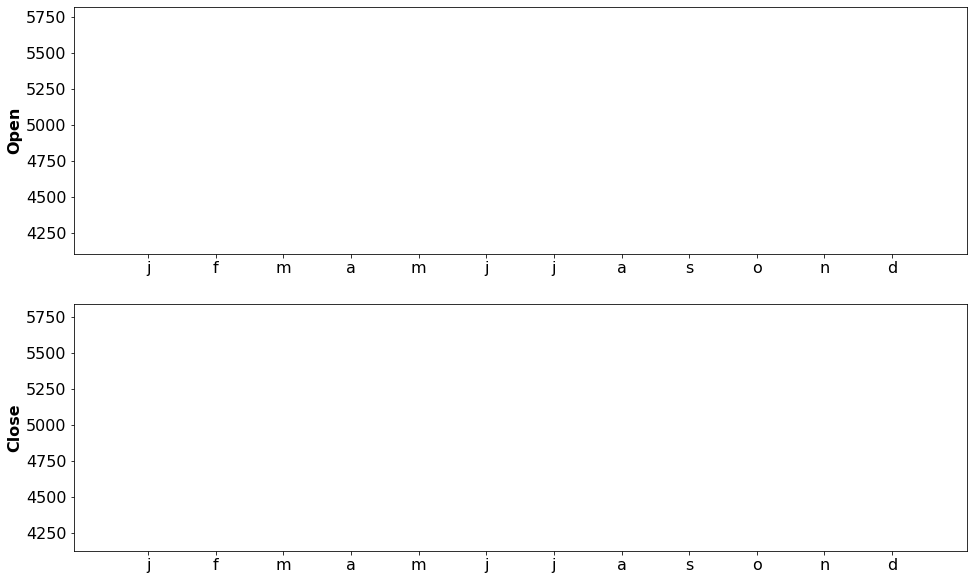

In [107]:
# The magic
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))
month_plot(y['Open'], ax=ax[0]);
ax[0].set_ylabel('Open', fontsize = 16, fontdict=dict(weight='bold'))
month_plot(y['Close'], ax=ax[1]);
ax[1].set_ylabel('Close', fontsize = 16, fontdict=dict(weight='bold'))

/var/folders/q_/k453wb756qb6rg_z6dc5p9fr0000gn/T/ipykernel_52834/2568615917.py:13: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', freq = 6)


Text(0.5, 0.98, 'Open decomposition')

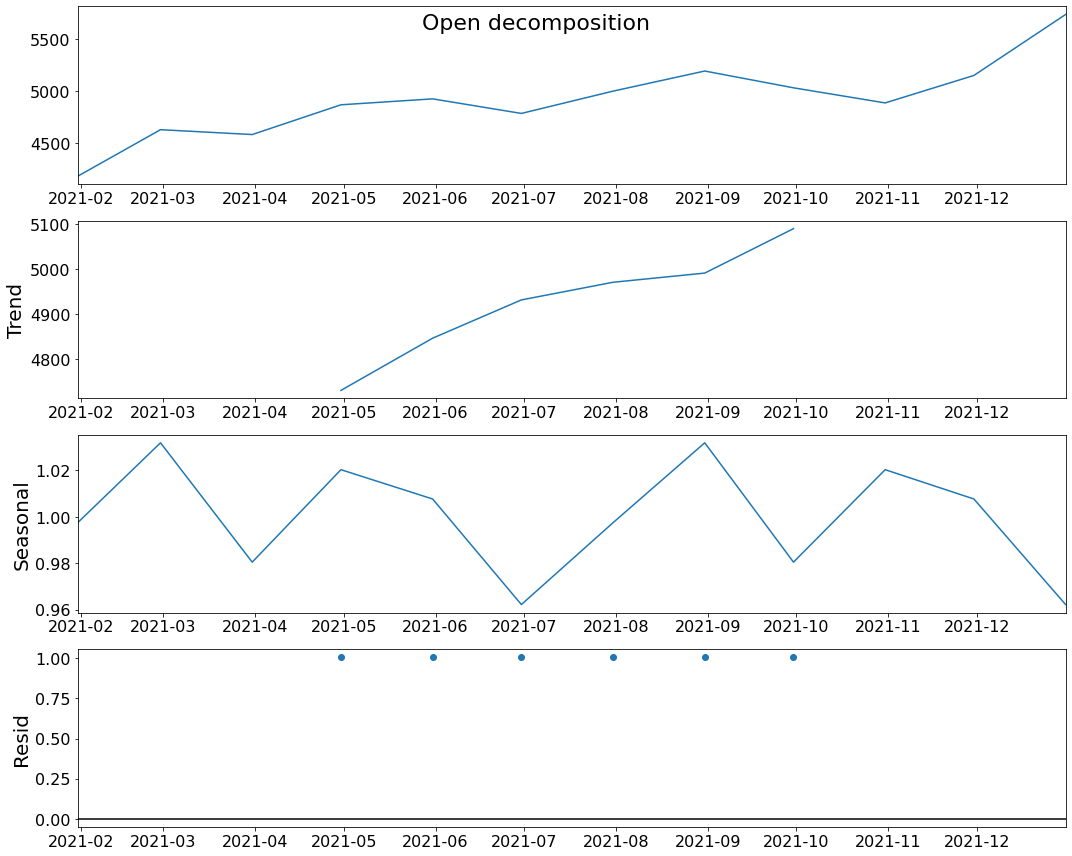

In [108]:
y = NVR[['Date','Open']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

# Setting rcparams
plt.rcParams['figure.figsize'] = 15, 12
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16

# Using statistical tools of statsmodel library
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative', freq = 6)
decomp = decomposition.plot()
decomp.suptitle('Open decomposition', fontsize=22)

No handles with labels found to put in legend.


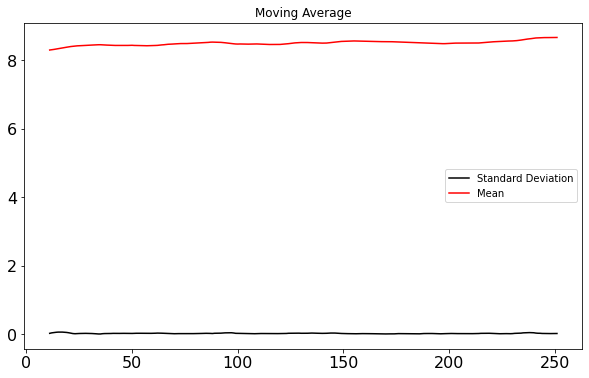

In [109]:
from pylab import rcParams
df_close=NVR['Close']
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

[1.         0.95742604 0.91109014 0.86948417 0.8328644  0.78953693
 0.74174256 0.69992511 0.66575458 0.63350566 0.59863724 0.56217178
 0.53307782 0.50961856 0.48455296 0.45855649 0.43165596 0.40715391
 0.38864773 0.36809271 0.34418415 0.32042236 0.29940776 0.27697558
 0.2571537  0.24148468 0.22520625 0.2100485  0.19845031 0.18835878
 0.17660732 0.16624076 0.15800702 0.15424094 0.1528881  0.14769041
 0.14469401 0.14470013 0.14053296 0.13238468 0.12715589 0.12543552
 0.12017056 0.11435451 0.11370342 0.11687306 0.11589736 0.11778329
 0.11504035 0.11034174 0.10482598 0.10438177 0.10631352 0.10500077
 0.09737122 0.09567336 0.09643195 0.09524401 0.0951356  0.09556964
 0.09658679]


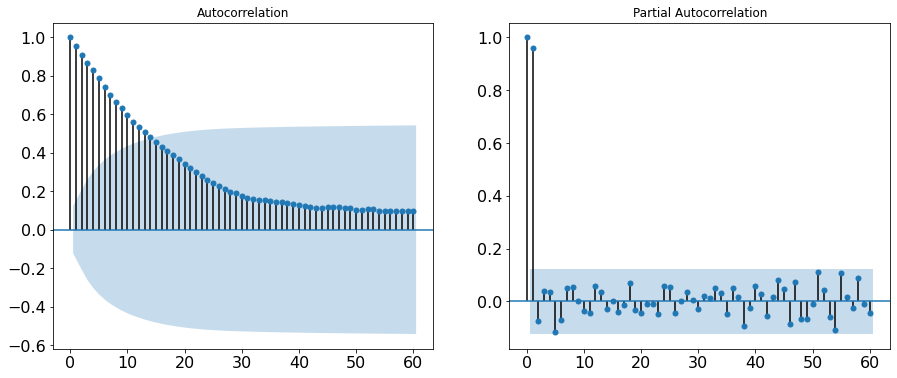

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(NVR['Open'], nlags=60, fft=False)
print(autocorr)

plot_acf(NVR['Open'].tolist(), lags=60, ax=ax[0], fft=False);
plot_pacf(NVR['Open'].tolist(), lags=60, ax=ax[1]);


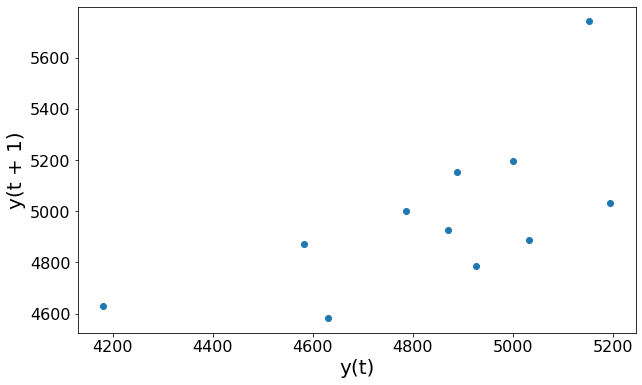

In [111]:
lag_plot(y['Open']);

## Moving Average

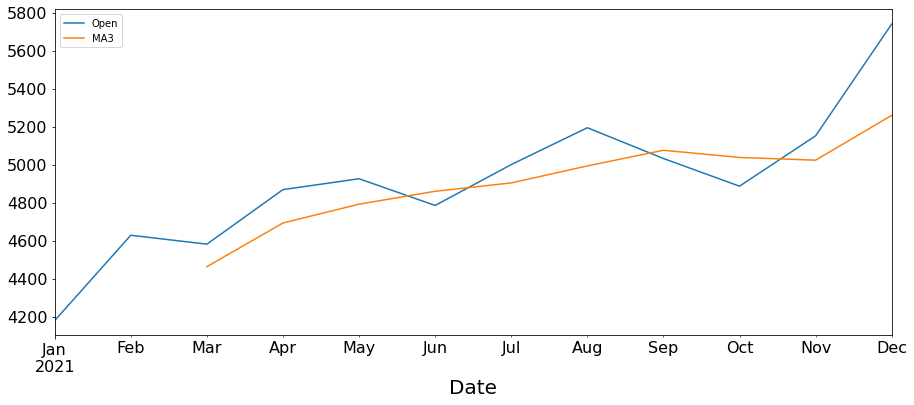

In [112]:
y = NVR[['Date','Open']].copy()
y.set_index('Date', inplace=True)
y.index = pd.to_datetime(y.index)
y = y.resample('1M').mean()

y['MA3'] = y.rolling(window=3).mean() 
y.plot(figsize=(15,6));


## Exponential Smoothing

/Users/saad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


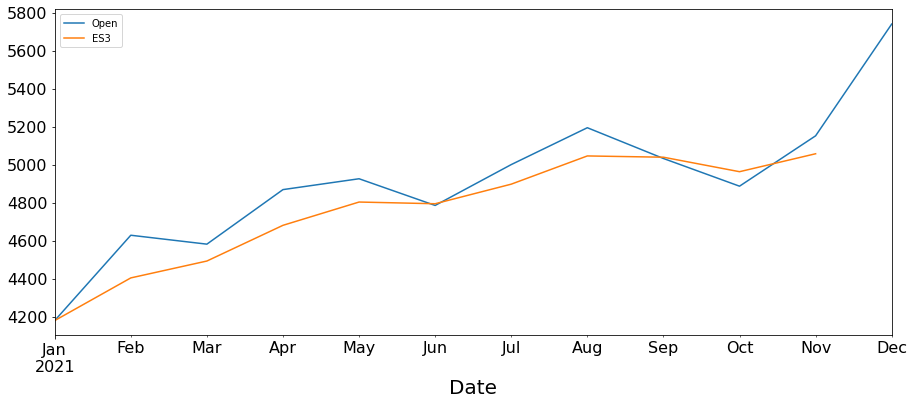

In [113]:
span = 3
# Weights of observations
alpha = 2/(span+1)

# Plot Simple exponential smoothing
y['ES3'] = SimpleExpSmoothing(y['Open']).fit(smoothing_level = alpha, optimized = False).fittedvalues.shift(-1)
y[['Open','ES3']].plot(figsize=(15,6));


In [114]:
NVR = NVR.reindex(index=NVR.index[::-1]) #reversing the stocks

NVR

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
251,2021-12-31,5884.100098,5917.700195,5850.500000,5908.870117,5908.870117,6300,2021,12
250,2021-12-30,5977.609863,5978.160156,5884.060059,5906.029785,5906.029785,8300,2021,12
249,2021-12-29,5880.479980,5962.430176,5861.790039,5959.330078,5959.330078,7800,2021,12
248,2021-12-28,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900,2021,12
247,2021-12-27,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600,2021,12
...,...,...,...,...,...,...,...,...,...
4,2021-01-08,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600,2021,1
3,2021-01-07,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600,2021,1
2,2021-01-06,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400,2021,1
1,2021-01-05,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800,2021,1


In [115]:
# Split data into train and validation set 90/10

NVR_dt=NVR.copy()

NVR_dt["Date"] = NVR_dt.index
NVR_dt = NVR_dt[["Date", "Open", "High", 
             "Low", "Close", "Adj Close", "Volume"]]
NVR_dt.reset_index(drop=True, inplace=True)
print(NVR_dt.head())
NVR_dt

   Date         Open         High          Low        Close    Adj Close  \
0   251  5884.100098  5917.700195  5850.500000  5908.870117  5908.870117   
1   250  5977.609863  5978.160156  5884.060059  5906.029785  5906.029785   
2   249  5880.479980  5962.430176  5861.790039  5959.330078  5959.330078   
3   248  5820.500000  5893.500000  5820.500000  5869.470215  5869.470215   
4   247  5817.000000  5830.970215  5763.479980  5820.069824  5820.069824   

   Volume  
0    6300  
1    8300  
2    7800  
3    7900  
4   12600  


,Date,Open,High,Low,Close,Adj Close,Volume
0,251,5884.100098,5917.700195,5850.500000,5908.870117,5908.870117,6300
1,250,5977.609863,5978.160156,5884.060059,5906.029785,5906.029785,8300
2,249,5880.479980,5962.430176,5861.790039,5959.330078,5959.330078,7800
3,248,5820.500000,5893.500000,5820.500000,5869.470215,5869.470215,7900
4,247,5817.000000,5830.970215,5763.479980,5820.069824,5820.069824,12600
...,...,...,...,...,...,...,...
247,4,4040.689941,4077.000000,3892.669922,3930.000000,3930.000000,44600
248,3,3997.479980,4080.729980,3977.030029,4025.929932,4025.929932,29600
249,2,3970.000000,4021.489990,3892.000000,3966.489990,3966.489990,29400
250,1,4025.199951,4049.989990,3965.000000,4008.909912,4008.909912,26800


In [116]:
NVR_dt['Date']=pd.to_datetime(NVR_dt['Date'])

In [117]:
NVR_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 1133 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       126 non-null    datetime64[ns]
 1   Open       126 non-null    float64       
 2   High       126 non-null    float64       
 3   Low        126 non-null    float64       
 4   Close      126 non-null    float64       
 5   Adj Close  126 non-null    float64       
 6   Volume     126 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 7.0 KB


In [118]:
NVR_train, NVR_test = NVR_dt[:int(len(NVR_dt)*0.9)], NVR_dt[int(len(NVR_dt)*0.9):]

In [119]:
plt.figure(figsize=(12,8));
ax=NVR_train.plot(grid=True,figsize=(12,8));
NVR_test.plot(ax=ax,grid=True,x='datetime' )
plt.legend(['NVR_test','NVR_train'])
plt.show()

KeyError: 'datetime'

<Figure size 864x576 with 0 Axes>

ValueError: view limit minimum -31411.65 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

/Users/saad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/saad/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


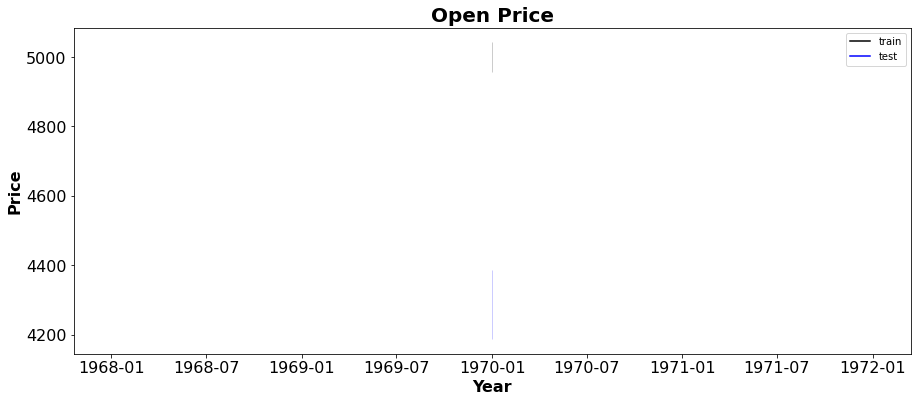

In [120]:
# Index disappeared, put them back
NVR_test = NVR_test.set_index('Date', drop=False)
NVR_train = NVR_train.set_index('Date', drop=False)

# Line plot
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(NVR_train['Date'], NVR_train['Open'], color = 'black')
sns.lineplot(NVR_test['Date'], NVR_test['Open'], color = 'blue')

# Formatting
ax.set_title('Open Price', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Price', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

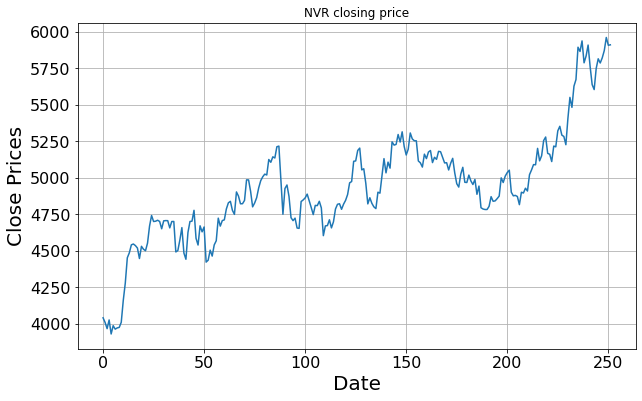

In [121]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(NVR['Close'])
plt.title('NVR closing price')
plt.show()

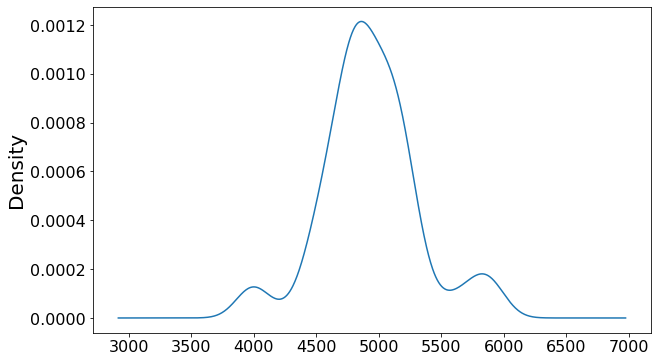

In [122]:
df_close = NVR['Close']
df_close.plot(kind='kde')


In [123]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(NVR_train['Open'], order = (1, 1, 2))
# disp=-1: no output
fitted = model.fit(disp = -1)
print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                  225
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -1301.200
Method:                       css-mle   S.D. of innovations             78.580
Date:                Sat, 25 Jun 2022   AIC                           2612.399
Time:                        13:33:24   BIC                           2629.480
Sample:                             1   HQIC                          2619.293
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -5.2896      4.329     -1.222      0.222     -13.774       3.195
ar.L1.D.Open     0.1813      0.344      0.526      0.599      -0.494       0.856
ma.L1.D.Open    -0.2334      0.337     -0.69

/Users/saad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/saad/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

In [125]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


NameError: name 'model_autoARIMA' is not defined

In [126]:
print(NVR_train.shape)
print(NVR_test.shape)
print(NVR.shape)

(226, 7)
(26, 7)
(252, 9)


In [127]:
fc, se, conf = fitted.forecast(225, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=NVR_train.index)
lower_series = pd.Series(conf[:, 0], index=NVR_train.index)
upper_series = pd.Series(conf[:, 1], index=NVR_train.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(NVR_train['Open'],color='red', label='training')
plt.plot(NVR_test['Open'], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('NVR Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

ValueError: Length of values (225) does not match length of index (226)

In [128]:
!pip install pmdarima

from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(NVR_train['Open'])

""", 
                             start_p = 0, 
                             start_q = 0,
                             test = 'adf', # use adftest to find optimal 'd'
                             max_p = 3,
                             max_q = 3, # maximum p and q
                             m = 7, # frequency of series
                             seasonal = False,
                             start_P = 0, 
                             D = 0, 
                             trace = True,
                             error_action = 'ignore',  
                             stepwise = True
"""

print(model_autoARIMA.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  226
Model:               SARIMAX(3, 1, 3)   Log Likelihood               -1295.351
Date:                Sat, 25 Jun 2022   AIC                           2604.702
Time:                        13:34:03   BIC                           2628.614
Sample:                             0   HQIC                          2614.353
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6105      0.153     -3.986      0.000      -0.911      -0.310
ar.L2         -0.4220      0.168     -2.519      0.012      -0.750      -0.094
ar.L3         -0.7754      0.138     -5.612      0.0

In [129]:
# Report performance
mse = mean_squared_error(NVR_test['Open'], fc[0:26])
print('MSE: '+str(mse))
mae = mean_absolute_error(NVR_test['Open'], fc[0:26])
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(NVR_test['Open'], fc[0:26]))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc[0:26] - NVR_test['Open'])/np.abs(NVR_test['Open']))
print('MAPE: '+str(mape))

MSE: 170195.70587539353
MAE: 343.007389792606
RMSE: 412.54782253139274
MAPE: 0.08373715609058746


In [130]:
accuracy=100-(mape*100)
print(accuracy)

91.62628439094125
